## Geopandas

Geopandas is a Python Library that extends 'pandas' by adding support for geospatial data

## Reproducible file paths

In [7]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

to import data we first use 'os' to creae a reproducible file path:

In [38]:
fp = os.path.join('data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp
ca_boundary = gpd.read_file(fp)

In [9]:
pigs = gpd.read_file(fp)
pigs

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


In [10]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [11]:
# check the data type of the pigs
print(type(pigs))

# check the data type of geom column
print(type(pigs.geometry))

# check the data type of the gbifID col
print(type(pigs))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [12]:
# check type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

what si the geometery type of the single feature in teh CA state boundary?

In [29]:
ca_boundary.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## CRS

*Coordinate Reference System* = instructions to locate each spatial feature of our data frame on the surface of the Earth. 

In [14]:
# access the crs of the geodataframe
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# examine CRS details
print('Ellipsoid:', pigs.crs.ellipsoid)
print('Datum:', pigs.crs.datum)
print('Is geographic?:', pigs.crs.is_geographic)
print('Is projected?:', pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic?: True
Is projected?: False


In [16]:
# obtain the geographic extent of the the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [17]:
# Examine CRS and extent of CA boundary
print('CRS: ', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS:  EPSG:4326 

[-124.29448    32.593433 -115.4356     40.934296]


In [18]:
pigs.crs == ca_boundary.crs

True

#### Data Wranglin
you can use all your 'pandas' data wrangling to wrangle 'geopandas.geodataframes'


## Example

### Exampline pig observations by year

In [19]:
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [20]:
# select data from 2020 onwards
pigs_recent = pigs[pigs['year'] >=2020]

# check length of og dataframe
print('Total number of observations:', len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ', len(pigs_recent))

Total number of observations: 1046
Number of observations since 2020:  606


### make a map

'gpd.geodataframe' has a 'plot()' method that quickly creaes a map for our data using the geospatial information.

<Axes: >

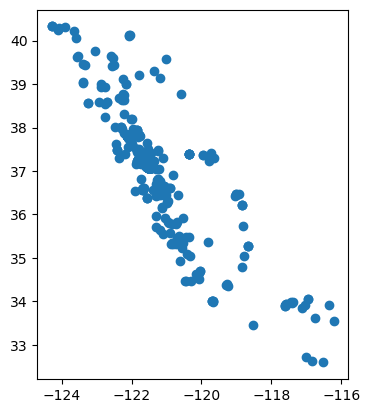

In [21]:
# Create a map

pigs_recent.plot()

## 'matplotlib' 

we can interact with 'matplotlib' via its 'pyplot' interface. 
Matplotlib graphs the data in someting called a **figure** which may have one or more **axes**. Th eaexs is *only* the area specieifed by the the x axis and the y axis what is plotted in it. A figure can include mulitple axes in it. 
To create a blank figure: 

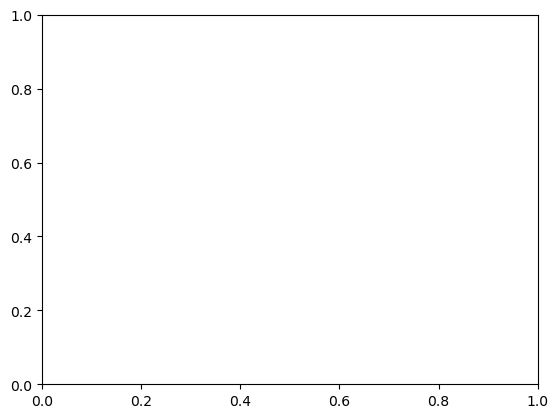

In [22]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()
# Display figure
plt.show()

### Adding a layer
Whe nusing 'matplotlib" it can be useful to think of creating a pot as adding layeres on an axis.

Example:

The first layer we want to add to our axis is the 'pigs-recent' point data

<function matplotlib.pyplot.show(close=None, block=None)>

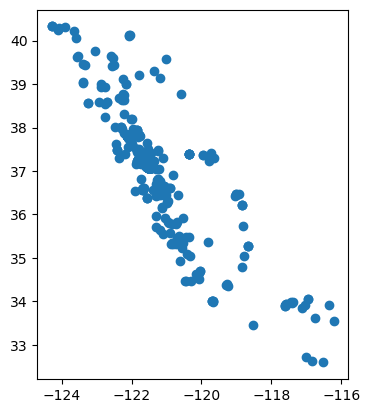

In [23]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# add data to axxis 
pigs_recent.plot(ax=ax)

plt.show

## Customization 

Some cusotminazation can be done directly in 'plot()' method for the dataframe. Some other is done by updating attribute fo the ax

<function matplotlib.pyplot.show(close=None, block=None)>

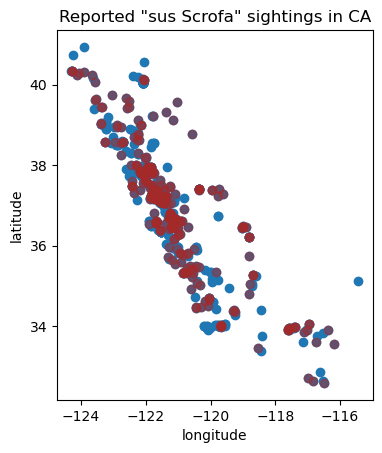

In [ ]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# add CA boundary
ca_boundary.plot(ax=ax,
                )

# add data to axxis 
pigs_recent.plot(ax=ax, #add plot to axis
                alpha = 0.5, # adjust transparency
                color= 'brown', #Change color
                edgecolor='yellow') # change color               

# update axis
ca_boundary
ax.set_title('Reported "sus Scrofa" sightings in CA')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
            

plt.show